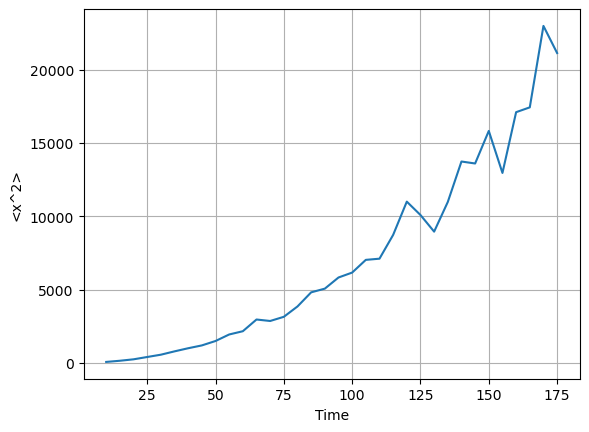

[  162.61768392 -9299.70371255]


Text(50, 25000, 'slope value= 162.62')

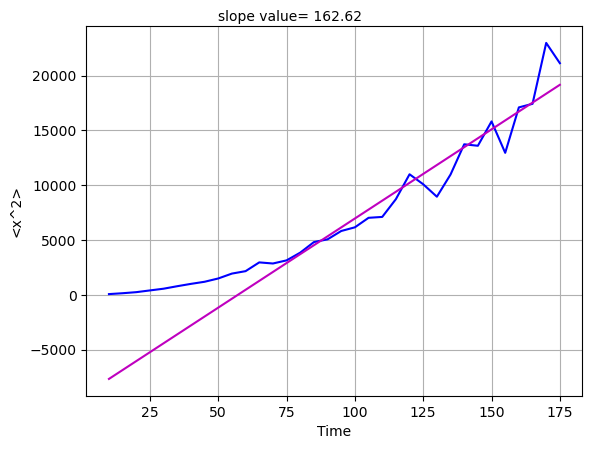

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
os.system('cls')

def brownian_motion(simulation_time, num_balls=100, ball_radius=3, pollen_radius=100, ball_mass=1, pollen_mass=100, Lx=(-300, 300), Ly=(-300, 300)):
    # Setting up box
    Lxn, Lxp = Lx
    Lyn, Lyp = Ly

    # Initial positions
    x = np.random.uniform(Lxn + ball_radius, Lxp - ball_radius, num_balls)
    y = np.random.uniform(Lyn + ball_radius, Lyp - ball_radius, num_balls)
    position_chart = np.column_stack((x, y))
    pollen_position = np.array([0.0, 0.0])

    # Initial velocities
    vx = np.random.randn(num_balls)
    vy = np.random.randn(num_balls)
    velocity_chart = np.column_stack((vx, vy))
    pollen_velocity = np.array([1.0, 0.0])

    # Temperature list
    temp_list = []

    # Simulation time variables
    dt = 0.8

    # Starting the simulation
    for _ in range(simulation_time):
        # Updating positions
        position_chart += velocity_chart * dt
        pollen_position += pollen_velocity * dt

        KE = 0.5 * (ball_mass * np.sum(np.linalg.norm(velocity_chart, axis=1) ** 2) + pollen_mass * np.linalg.norm(pollen_velocity) ** 2)
        temp_list.append(KE / num_balls)

        # Checking collision between balls and walls
        velocity_chart[(position_chart[:, 0] < Lxn + ball_radius) & (velocity_chart[:, 0] < 0), 0] *= -1
        velocity_chart[(position_chart[:, 0] > Lxp - ball_radius) & (velocity_chart[:, 0] > 0), 0] *= -1
        velocity_chart[(position_chart[:, 1] < Lyn + ball_radius) & (velocity_chart[:, 1] < 0), 1] *= -1
        velocity_chart[(position_chart[:, 1] > Lyp - ball_radius) & (velocity_chart[:, 1] > 0), 1] *= -1

        # Checking collision between pollen and walls
        pollen_velocity[(pollen_position[0] < Lxn + pollen_radius) & (pollen_velocity[0] < 0), 0] *= -1
        pollen_velocity[(pollen_position[0] > Lxp - pollen_radius) & (pollen_velocity[0] > 0), 0] *= -1
        pollen_velocity[(pollen_position[1] < Lyn + pollen_radius) & (pollen_velocity[1] < 0), 1] *= -1
        pollen_velocity[(pollen_position[1] > Lyp - pollen_radius) & (pollen_velocity[1] > 0), 1] *= -1

        # Checking collision between balls and pollen
        r_pb = pollen_position - position_chart
        norm_rpb = np.linalg.norm(r_pb, axis=1)
        collided = (norm_rpb < (pollen_radius + ball_radius)).reshape(-1, 1)
        v_pb = pollen_velocity - velocity_chart
        approaching = (np.sum(r_pb * v_pb, axis=1) < 0).reshape(-1, 1)

        # Find the indices where the collision condition is satisfied
        collision_indices = np.where(np.logical_and(collided.flatten(), approaching.flatten()))[0]

        # Check if there are any collisions and ensure indices are within bounds
        if len(collision_indices) > 0:
            collision_indices = collision_indices[collision_indices < len(pollen_velocity)]
            # Perform the element-wise operations using broadcasting
            if len(collision_indices) > 0:
                pollen_velocity[collision_indices] += -2 * np.sum(v_pb[collision_indices], axis=1) * ball_mass / (ball_mass + pollen_mass)
      
        clear_output(wait=True)

    average_temp = np.sum(temp_list) / len(temp_list)
    return np.linalg.norm(pollen_position) ** 2

num_repeat = 10
sim_time = np.linspace(10, 180, 34, endpoint=False)
displacement = []
for time in sim_time:
    sum_displacement = 0
    for _ in range(num_repeat):
        sum_displacement += brownian_motion(int(time))
    displacement.append(sum_displacement / num_repeat)

plt.plot(sim_time, displacement)
plt.xlabel('Time')
plt.ylabel('<x^2>')
plt.grid(True)
plt.show()
fit_coefficients = np.polyfit(sim_time[10:],displacement[10:],1)
print(fit_coefficients)
poly_values = np.polyval(fit_coefficients,sim_time)

plt.plot(sim_time,displacement,'b-',label='simulation')
plt.plot(sim_time,poly_values,'m-',label='linear polyfit')
plt.xlabel('Time')
plt.ylabel('<x^2>')
# plt.plot(sim_time,slope*sim_time)
plt.grid(True)
plt.text(50,25000,f'slope value= {np.around(fit_coefficients[0],2)}')